# Qiskit 설치 및 업데이트

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

    `conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

    `conda install jupyter notebook` 혹은 `conda install jupyterlab`

4.  Qiskit 설치 및 업데이트

    `pip install qiskit` 및 `pip install -U qiskit`

5. qiskit_ibm_provider 설치

    `pip install qiskit qiskit_ibm_provider`

6. qiskit-ibm-runtime 설치

    `pip install qiskit-ibm-runtime`

7. qiskit-aer 설치

    `pip install qiskit-aer`

8.  (Option) Qiskit visualization tool 설치

- `bash`: `pip install qiskit[visualization]`

- `zsh`: `pip install 'qiskit[visualization]'`

설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

# Qiskit Update Highlighs (9월 14일자 업데이트)

## Qiskit 0.44 주요 업데이트 사항

- `qiskit-ibmq-provider` 패키지(`qiskit.providers.ibmq`)의 공식적인 지원이 종료되었습니다. `qiskit-ibm-provider`, `qiskit-ibm-experiment`, 그리고 `qiskit-ibm-runtime`로 대체하세요. 대체 코드 예제는 하단 참조. <https://github.com/Qiskit/qiskit-ibmq-provider#migration-guides>
  
- `qiskit-aer`가 Qiskit metapackage에서 분리되었습니다. 따라서 qiskit 설치 시 `qiskit-aer`를 추가로 설치해야하고 `qiskit_aer`를 import 해야 합니다.
  
- 현재 버전이 Qiskit metapackage의 마지막 릴리즈이기 때문에, 다음 버전(0.45.0)에서 선택적 의존성(dependency) 설치를 위한 다음의 setuptools extra가 작동하지 않습니다:
  - `nature`
  - `machine-learning`
  - `finance`
  - `optimization`
  - `experiments` 

  예시로, `pip install qiskit[experiments]` 대신 `pip install qiskit qiskit-experiments`를 사용하여 `qiskit`과 `qiskit-experiments` 패키지를 설치하세요. 
  
  마찬가지로 `all` extra (i.e. `pip install "qiskit[all]"`) 또한 위 패키지들을 설치하지 않습니다.
  
- 이로 인해 Qiskit metapackage에는 `qiskit-terra`만 남게 됩니다. 따라서 다음 버전(0.45.0)부터는 이 둘을 구분하지 않습니다. 따라서 Qiskit metapackage의 버전을 알려주던 `qiskit.__qiskit_version__`이 더이상 필요하지 않게 되어 `qiskit.__version__`으로 대체되었습니다.

- Transpiler가 [Dynamic Circuit (Control flow)](https://qiskit.org/documentation/apidoc/circuit.html#control-flow-operations)를 모든 optimization level에서 지원됩니다. 예를 들어, [`transpile()`](https://qiskit.org/documentation/apidoc/compiler.html#qiskit.compiler.transpile)과 [`generate_preset_pass_manager()`](https://qiskit.org/documentation/apidoc/transpiler_preset.html#qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager)에서 `optimization_level` 키워드를 2 또는 3으로 설정하는 것을 지원합니다.

- [`IfElseOP.condition`, `WhileLoopOp.condition`, `SwitchCaseOp.target`](https://qiskit.org/documentation/apidoc/circuit.html#control-flow-operations) 필드가 새로운 classical-expression 타입인 [`expr.Expr`](https://qiskit.org/documentation/apidoc/circuit_classical.html#qiskit.circuit.classical.expr.Expr) 객체를 받을 수 있습니다. 이는 classical condition을 적용하는데 기존의 튜플 방식(i.e., `(ClassicalRegister | Clbit, int)`)보다 훨신 나은 방식입니다. 예를 들어, 서로 다른 두개의 `ClassicalRegister`의 동치 조건이나 classical bit끼리의 논리 OR를 표현할 수 있습니다. 예제는 하단 및 [`qiskit.circuit.classical`](https://qiskit.org/documentation/apidoc/circuit_classical.html#module-qiskit.circuit.classical)을 참조하세요.

  이 초기 릴리즈에서 아래 연산이 추가되었습니다 (아직 IBM 백엔드에서 지원하지 않는 연산도 있음):
  - `bit_not()`
  - `logic_not()`
  - `bit_and()`
  - `bit_or()`
  - `bit_xor()`
  - `logic_and()`
  - `logic_or()`
  - `equal()`
  - `not_equal()`
  - `less()`
  - `less_equal()`
  - `greater()`
  - `greater_equal()`
  
  Python `int`와 `bool` 리터럴과 Qiskit `ClassicalRegister`, `Clbit` 객체를 받습니다. ([doc](https://qiskit.org/documentation/apidoc/circuit_classical.html#construction))

  모든 Classical expression은 Qiskit transpiler 스텍과 QPY 병렬화([`qiskit.qpy`](https://qiskit.org/documentation/apidoc/qpy.html#module-qiskit.qpy)), 그리고 OpenQASM3([`qiskit.qasm3`](https://qiskit.org/documentation/apidoc/qasm3.html#module-qiskit.qasm3)) 추출을 지원합니다.

- 이제 `QuantumCircuit.draw`가 `mpl`로 그릴 때 Control flow를 더 잘 표현합니다.

- [논문](https://arxiv.org/abs/2210.16195)을 기반으로 하는 새로운 linear nearest neighbor connectivity (LNN) synthesis algorithm이 추가되었습니다. 이 알고리즘은 LNN 연결성을 가정한 CX-CZ 양자회로를 위한 것으로, `.synth_clifford_depth_lnn()`의 기본 합성 방식으로 채택되었습니다. 이로서 Clifford 분해의 깊이가 $9n+4$에서 $7n+2$로 감소하였습니다. 
  
- 양자회로 변수대입과 `ConsolidateBlocks`의 성능이 비약적으로 향상되었습니다. 
  
  `QuantumCircuit.assign_parameters`와 `QuantumCircuit.bind_parameters`가 application development 등의 특정 작업에서 훨신 빨라졌습니다. 또한, `QuantumCircuit.assign_parameters`에 `Dict` 형식의 매개변수를 사용하는 경우 `flat_input`과 `strict` 키워드를 사용하여 성능을 향상시킬 수 있습니다. <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.assign_parameters>

  아래 이미지는 `EffectiveSU2` 매개변수 양자회로 클래스를 통해 `transpile()`의 성능을 기존과 비교한 결과입니다.
  ![nn](1*5T7rRRtO7GzXgYiNqUI3pw.webp)

  `ConsolidateBlocks` transpiler pass가 내부적으로 재조정됨에 따라 transpile 시간이 단축되었습니다. 사용자의 코드를 변경시키지 않아도 `.transpile(optimization_level=3)`의 성능 향상을 체감할 수 있습니다.

- `qiskit.quantum_info`에 [`negativitiy()`](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.negativity), [`schmidt_decomposition()`](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.schmidt_decomposition)이 추가되었습니다. 또한 [`SparsePauliOp`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html#qiskit.quantum_info.SparsePauliOp)와 [`Parameter`](https://qiskit.org/documentation/stubs/qiskit.circuit.Parameter.html#qiskit.circuit.Parameter)의 곱(`*, __mul__`)이 추가되었습니다.

- [`qiskit.algorithm`](https://qiskit.org/documentation/apidoc/algorithms.html#module-qiskit.algorithms) 모듈이 다음 릴리즈에 제거됩니다. 독립적인 라이브러리인 [`qiskit-algorithm`](https://github.com/qiskit-community/qiskit-algorithms)로 대체하세요. (<https://qisk.it/algo_migration> 참조)

- (~Qiskit Terra 0.23) 2023년 6월 27일에 종료되는 Python 3.7을 지원하지 않습니다. 더 높은 버전의 Python을 사용하세요.

## 예제 코드

### `qiskit-ibmq-provider` migration guide

기존 방식의 코드는 다음과 같습니다.

```python
from qiskit import IBMQ

# 저장 없이 IBM Quantum 계정 활성화.
IBMQ.enable_account(token=MY_API_TOKEN)

# 계정 토큰(증명서) 저장.
IBMQ.save_account(token=MY_API_TOKEN)

# 계정 불러오기.
provider = IBMQ.load_account()

# hub/group/project 선택하여 불러오기.
provider = IBMQ.get_provider(hub="ibm-q-yonsei", group="externalq-meetup", project="tutorials")
```

새로운 방식의 코드는 다음과 같습니다.

In [2]:
from qiskit_ibm_provider import IBMProvider

# 저장 없이 IBM Quantum 계정 활성화.
# IBMProvider.enable_account(token=MY_API_TOKEN)

# 계정 토큰(증명서) 저장.
# IBMProvider.save_account(token=MY_API_TOKEN)

# 계정 불러오기.
# provider = IBMProvider()

# hub/group/project 선택하여 불러오기.
# provider = IBMProvider(instance="ibm-q-yonsei/externalq-meetup/tutorials")
# provider = IBMProvider(instance="ibm-q-internal/deployed/default")
provider = IBMProvider(instance="ibm-q/open/main")

In [3]:
#밋업 참가자들에게 제공되는 양자 백엔드 목록
provider.backends(filters=lambda x: 'simulator' not in x.name)

[<IBMBackend('ibmq_manila')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>]

### Initial Support for Classical Expressions: `expr.Expr`

새로운 classical expression은 `ParameterExpression` 과 다르게 지원되는 backend에서 *runtime*으로 실행됩니다. 간단한 예제 코드는 다음과 같습니다.

In [4]:
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.classical import expr

qr = QuantumRegister(4)
cr1 = ClassicalRegister(2)
cr2 = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr1, cr2)
qc.h(0)
qc.cx(0, 1)
qc.h(2)
qc.cx(2, 3)
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# 기존 방식
with qc.if_test((cr1, 3)) as else_:
  qc.x(0)
with else_:
  qc.y(1)

# 문제점: 아래 Control flow를 표현하기는 어려움.

# 새로운 방식
# 두 레지스터가 같은지 확인
with qc.if_test(expr.equal(cr1, cr2)) as else_:
  qc.h(0)
with else_:
  qc.s(1)

# 두 비트중 하나라도 1이면 반복
# with qc.while_loop(expr.logic_or(cr1[0], cr1[1])):
#   qc.reset(0)
#   qc.reset(1)
#   qc.measure([0, 1], cr1)

### Additional support for Dynamic Circuits in the Transpiler & OpenQASM3

Qiskit 0.39에서부터 optimization level 0, 1에 대한 control flow를 지원했습니다. 새로운 릴리즈에서 이것이 optimization level 2, 3으로 확대되었습니다.

In [5]:
from qiskit import transpile
from qiskit.circuit import IfElseOp, WhileLoopOp, SwitchCaseOp

backend = provider.get_backend('ibm_perth')
# backend.target.add_instruction(SwitchCaseOp, name="switch_case")
# backend.target.add_instruction(IfElseOp, name="if_else")
# backend.target.add_instruction(WhileLoopOp, name="while_loop")
compiled_qc = transpile(qc, backend, optimization_level=3)

/Users/shaun/anaconda3/envs/qiskit/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/shaun/anaconda3/envs/qiskit/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


또한 `expr.Expr`을 포함한 Dynamic circuit을 OpenQASM3 형식으로 추출할 수 있습니다.

In [6]:
from qiskit.qasm3 import dumps

compiled_qasm = dumps(compiled_qc)
print(compiled_qasm)

OPENQASM 3;
include "stdgates.inc";
bit[2] c0;
bit[2] c1;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
cx $3, $1;
rz(pi/2) $6;
sx $6;
rz(pi/2) $6;
cx $6, $5;
c0[0] = measure $6;
c0[1] = measure $5;
if (c0 == 3) {
  x $6;
} else {
  rz(pi) $5;
  x $5;
}
c1[0] = measure $3;
c1[1] = measure $1;
if (c0 == c1) {
  rz(pi/2) $6;
  sx $6;
  rz(pi/2) $6;
} else {
  rz(pi/2) $5;
}



하지만 아직 `qiskit_qasm3_import` 패키지를 통한 load는 지원하지 않습니다. 추후 업데이트를 확인해주세요

In [7]:
from qiskit.qasm3 import loads
import traceback

try:
  loaded_qc = loads(compiled_qasm)
except:
  print(traceback.format_exc().splitlines()[-1])

qiskit.qasm3.exceptions.QASM3ImporterError: "23,4: conditions must be 'bit == const bool' or 'bitarray == const int', not 'bit[2] == bit[2]'"


### Control Flow Representation for the mpl Circuit Drawer

기존 Control flow를 표현하는 방식은 아래 코드에 나온 것처럼 직관적이지 않았습니다.

In [8]:
qc.draw(fold=-1)

┌───┐     ┌─┐         ┌──────────┐┌──────────┐
q0_0: ┤ H ├──■──┤M├─────────┤0         ├┤0         ├
      └───┘┌─┴─┐└╥┘┌─┐      │          ││          │
q0_1: ─────┤ X ├─╫─┤M├──────┤1         ├┤1         ├
      ┌───┐└───┘ ║ └╥┘┌─┐   │          ││          │
q0_2: ┤ H ├──■───╫──╫─┤M├───┤          ├┤          ├
      └───┘┌─┴─┐ ║  ║ └╥┘┌─┐│  If_else ││          │
q0_3: ─────┤ X ├─╫──╫──╫─┤M├┤          ├┤          ├
           └───┘ ║  ║  ║ └╥┘│          ││  If_else │
c0_0: ═══════════╩══╬══╬══╬═╡0         ╞╡1         ╞
                    ║  ║  ║ │          ││          │
c0_1: ══════════════╩══╬══╬═╡1         ╞╡2         ╞
                       ║  ║ └──────────┘│          │
c1_0: ═════════════════╩══╬═════════════╡3         ╞
                          ║             │          │
c1_1: ════════════════════╩═════════════╡0         ╞
                                        └──────────┘

In [9]:
compiled_qc.draw(fold=-1)

global phase: π/2
                                                                                    
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────────────
                                           ┌───┐         ┌─┐                        
     q0_3 -> 1 ────────────────────────────┤ X ├─────────┤M├────────────────────────
                                           └─┬─┘         └╥┘                        
ancilla_1 -> 2 ──────────────────────────────┼────────────╫─────────────────────────
               ┌─────────┐┌────┐┌─────────┐  │        ┌─┐ ║                         
     q0_2 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────────┤M├─╫─────────────────────────
               └─────────┘└────┘└─────────┘           └╥┘ ║                         
ancilla_2 -> 4 ────────────────────────────────────────╫──╫─────────────────────────
                                           ┌───┐   ┌─┐ ║  ║ ┌──────────┐┌──────────┐
     q0_1 -> 5 ────────────────────────────┤ X ├───┤M├─╫──╫─┤1         ├┤1         ├
               ┌─────────┐┌────┐┌─────────┐└─┬─┘┌─┐└╥┘ ║  ║ │          ││          │
     q0_0 -> 6 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├─╫──╫──╫─┤0         ├┤0         ├
               └─────────┘└────┘└─────────┘     └╥┘ ║  ║  ║ │  If_else ││          │
         c0_0: ══════════════════════════════════╩══╬══╬══╬═╡0         ╞╡1         ╞
                                                    ║  ║  ║ │          ││  If_else │
         c0_1: ═════════════════════════════════════╩══╬══╬═╡1         ╞╡2         ╞
                                                       ║  ║ └──────────┘│          │
         c1_0: ════════════════════════════════════════╩══╬═════════════╡3         ╞
                                                          ║             │          │
         c1_1: ═══════════════════════════════════════════╩═════════════╡0         ╞
                                                                        └──────────┘

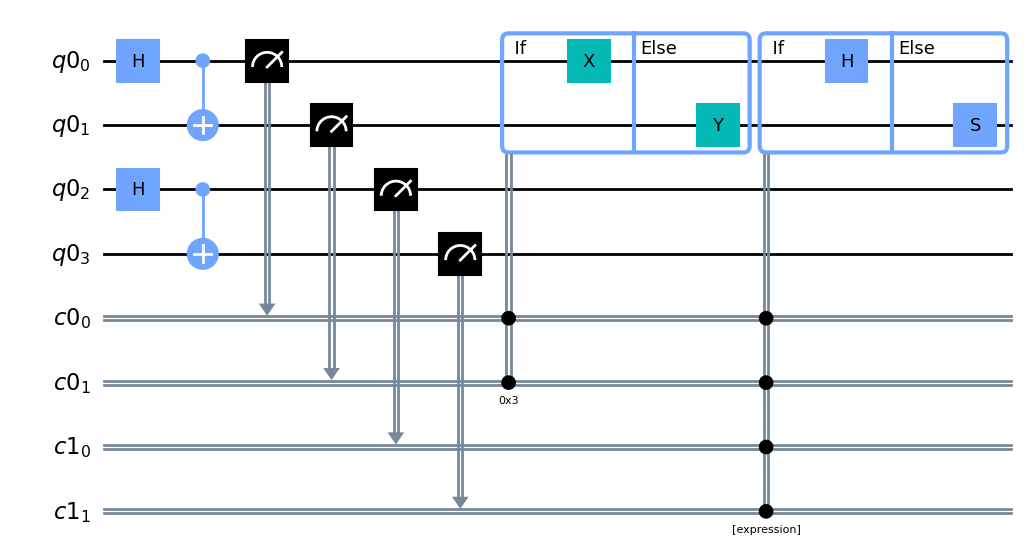

In [10]:
qc.draw('mpl')

하지만 `mpl`(Matplotlib)에 대한 새로운 표현 방식을 지원하여 더 직관적으로 Control flow를 표현할 수 있습니다.

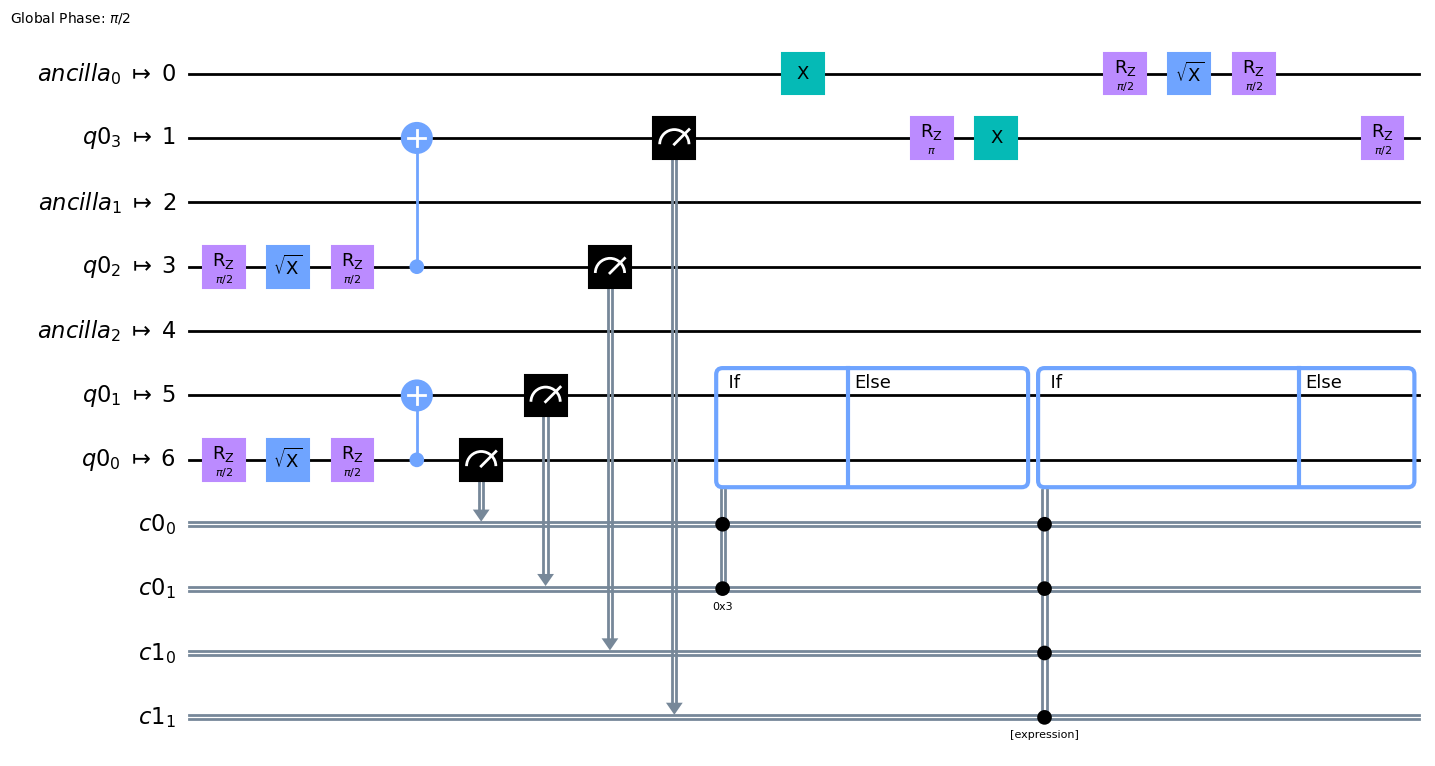

In [11]:
compiled_qc.draw('mpl')

간단한 Quantum Teleportation 예제를 통해 비교해보겠습니다. 이를 이용해 기존 `.c_if()` 대신 `SwitchCaseOp`를 사용하여 channel을 강조하여 표현할 수 있습니다.

           ┌────────────────────────────────────────────────┐      ░      ┌───┐┌─┐ ░                 
  alice_0: ┤ Initialize(0.60082+0.15537j,-0.42802-0.65702j) ├──────░───■──┤ H ├┤M├─░─────────────────
           └─────────────────────┬───┬──────────────────────┘      ░ ┌─┴─┐└┬─┬┘└╥┘ ░                 
  alice_1: ──────────────────────┤ H ├─────────────────────────■───░─┤ X ├─┤M├──╫──░─────────────────
                                 └───┘                       ┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌──────────────┐
      bob: ──────────────────────────────────────────────────┤ X ├─░────────╫───╫──░─┤0             ├
                                                             └───┘ ░        ║   ║  ░ │              │
channel_0: ═════════════════════════════════════════════════════════════════╬═══╩════╡0             ╞
                                                                            ║        │              │
channel_1: ═════════════════════════════════════════════════════════════════╩═════

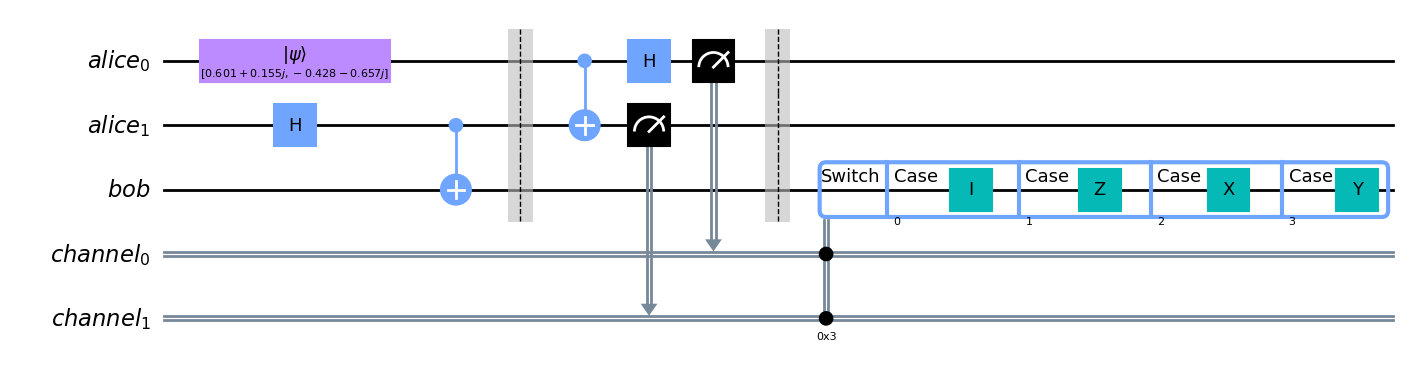

In [17]:
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import XGate, ZGate, YGate, IGate

alice = QuantumRegister(2, name='alice')
bob = QuantumRegister(1, name='bob')
channel = ClassicalRegister(2, name='channel')

teleportation_circuit = QuantumCircuit(alice, bob, channel, name='teleportation')

# bell state
teleportation_circuit.h(alice[1])
teleportation_circuit.cx(alice[1], bob[0])

# alice's qubit
random_state = random_statevector(2)
teleportation_circuit.initialize(random_state.data, alice[0])
teleportation_circuit.barrier()

# bell measure
teleportation_circuit.cx(alice[0], alice[1])
teleportation_circuit.h(alice[0])
teleportation_circuit.measure(alice, channel)
teleportation_circuit.barrier()

# send measured bits to bob & decode
codebook = {'0b00':IGate(), '0b01':ZGate(), '0b10':XGate(), '0b11':YGate()} # qiskit bit order
with teleportation_circuit.switch(channel) as case:
    for key, gate in codebook.items():
        with case(int(key, base=0)):
            teleportation_circuit.append(gate, [bob[0]]) # ignore global phase
# alternative
# teleportation_circuit.x(bob[0]).c_if(channel[1], 1)
# teleportation_circuit.z(bob[0]).c_if(channel[0], 1)

print(teleportation_circuit.draw(fold=-1))
teleportation_circuit.draw('mpl')


### New Synthesis Algorithm

CX-회로를 나타내는 binary invertible 행렬 `mat_x`와 CZ-회로를 나타내는 binary symmetric 행렬 `mat_z`를 사용하여 앞서 설명한 합성 알고리즘을 초기화할 수 있습니다.

In [13]:
import numpy as np
from qiskit.synthesis.linear_phase import synth_cx_cz_depth_line_my

mat_x = np.array([[0, 1], [1, 1]])
mat_z = np.array([[0, 1], [1, 0]])
qc = synth_cx_cz_depth_line_my(mat_x, mat_z)

### Quantum Information Features

- `negativity()`: 양자 상태의 nagativity를 계산합니다. 양자 상태의 entanglement를 측정하는데 사용됩니다. <https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.negativity>
$$ \mathcal{N}(\rho) = \frac{\|\rho^{T_A}\|_1 - 1}{2} $$

In [14]:
from qiskit.quantum_info.states.densitymatrix import DensityMatrix
from qiskit.quantum_info.states.statevector import Statevector
from qiskit.quantum_info import negativity
import numpy as np

# Constructing a two-qubit bell state vector
state = np.array([0, 1/np.sqrt(2), -1/np.sqrt(2), 0])
# Calculating negativity of statevector
negv0 = negativity(Statevector(state), [1])

# Creating the Density Matrix (DM)
rho = DensityMatrix.from_label("10+")
# Calculating negativity of DM
negv1 = negativity(rho, [0, 1])

print('Bell state: N={:.2f}\nproduct state: N={:.2f}'.format(negv0, negv1))

Bell state: N=0.50
product state: N=-0.00


- `schmidt_decomposition()`: 양자 상태의 Schmidt decomposition을 계산합니다. <https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.schmidt_decomposition>
$$ \ket{\psi}_{AB} = \sum_{k}\lambda_k \ket{u_k}_A \ket{v_k}_B $$

In [15]:
from qiskit.quantum_info.states.densitymatrix import DensityMatrix
from qiskit.quantum_info.states.statevector import Statevector
from qiskit.quantum_info import schmidt_decomposition
import numpy as np

# Constructing a two-qubit bell state vector
state = np.array([0, 1/np.sqrt(2), -1/np.sqrt(2), 0])
# Calculating schmit coeff of statevector
sch0 = schmidt_decomposition(Statevector(state), [1])

print('Bell state=', end='')
print(*['({:.3f})|{}>⊗|{}>'.format(s, u.data, v.data) for s, u, v in sch0], sep='+')

# Creating the Density Matrix (DM)
rho = DensityMatrix.from_label("10+")
# Calculating schmit coeff of DM
sch1 = schmidt_decomposition(rho, [0, 1])

print('product state=', end='')
print(*['({:.3f})|{}>⊗|{}>'.format(s, u.data, v.data) for s, u, v in sch1], sep='+')

# compare entanglement by majorization
print('Entanglement: ', end='')
if max(map(lambda x: x[0], sch0)) > max(map(lambda x: x[0], sch1)):
  print('Bell state < product state')
else:
  print('Bell state > product state')

Bell state=(0.707)|[ 0.+0.j -1.+0.j]>⊗|[-1.+0.j -0.+0.j]>+(0.707)|[-1.+0.j  0.+0.j]>⊗|[0.+0.j 1.+0.j]>
product state=(1.000)|[ 0.+0.j -1.+0.j]>⊗|[-0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]>
Entanglement: Bell state > product state


- `SparsePauilOp`와 `Parameter`를 곱하는것이 가능해졌습니다. <https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html#qiskit.quantum_info.SparsePauliOp> 이를 통해 Parameterized Observable을 다루는 것이 가능해졌습니다. `qiskit.primitives` 예제를 통해 자세히 알아봅시다.

In [16]:
from qiskit.primitives import Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

psi = RealAmplitudes(num_qubits=2, reps=5)
theta = np.ones(psi.num_parameters)

h_params = ParameterVector('h', length=4)
h_coeff = np.array([1, 2, 3, 4])

pstrings = ["II", "IZ", "ZI", "ZZ"]

pH = sum([h * SparsePauliOp(pstring) for h, pstring in zip(h_params, pstrings)]) # parameterized observable
npH = SparsePauliOp.from_list(list(zip(pstrings, h_coeff))) # non-parameterized observable

estimator = Estimator()

# calculate [ <psi(theta1)|H|psi(theta1)> ]
job = estimator.run([psi, psi], [pH, npH], [theta, theta])
job_result = job.result() # It will block until the job finishes.

print(f"The primitive-job finished with result {job_result}")
print()

p_result, np_result = job_result.values
print('Value of |<psi(theta1)|H|psi(theta1)>|')
print('Parameterized result: {:.4f}'.format(float(p_result.bind(dict(zip(p_result.parameters, h_coeff))).abs())))
print('Non-Parameterized result: {:.4f}'.format(np.abs(np_result)))

The primitive-job finished with result EstimatorResult(values=array([ParameterExpression(1.0*h[0] + 0.984622161015623*h[1] - 0.978801852903312*h[2] - 0.96586184758891*h[3]),
       (-3.8306086270343314+0j)], dtype=object), metadata=[{}, {}])

Value of |<psi(theta1)|H|psi(theta1)>|
Parameterized result: 3.8306
Non-Parameterized result: 3.8306


# Qiskit Global 커뮤니티는 2주에 한번씩, 개발자 밋업을 개최하고 있습니다.

- Repo: <https://github.com/Qiskit/feedback/wiki/Qiskit-DemoDays>
- Tutorial Notebook: <https://github.com/Qiskit/feedback/tree/main/demo-day-notebooks>
- Release Note: <https://qiskit.org/documentation/release_notes.html>

감사합니다!